# Lab 06: Prompt Engineering Fundamentals

**Course:** Generative AI for Banking Sector  
**Institution:** Banco Nacional de Costa Rica (BNCR)  
**Instructor:** Manuela Larrea  
**Duration:** 3 hours

---

## Learning Objectives

By the end of this lab, you will be able to:

1. Understand the principles of effective prompt engineering
2. Apply zero-shot, one-shot, and few-shot learning techniques
3. Use chain-of-thought prompting for complex reasoning
4. Create structured outputs (JSON, tables, lists)
5. Implement role-based prompting for banking scenarios
6. Handle edge cases and improve prompt robustness
7. Measure and improve prompt quality

---

## Azure Infrastructure for This Lab

```
╔══════════════════════════════════════════════════════════════════════════╗
║                  LAB 06 - AZURE INFRASTRUCTURE                           ║
╚══════════════════════════════════════════════════════════════════════════╝

┌─────────────────────────────────────────────────────────────────────────┐
│                        YOU (Jupyter Notebook)                            │
│                                                                           │
│  ┌─────────────────┐  ┌──────────────────┐  ┌────────────────────────┐ │
│  │ System Prompts  │  │  User Messages   │  │  Temperature Control   │ │
│  └─────────────────┘  └──────────────────┘  └────────────────────────┘ │
└────────────────────────────────┬────────────────────────────────────────┘
                                 │
                                 │ Optimized Prompts
                                 ▼
                    ┌────────────────────────────┐
                    │   Azure OpenAI Service     │
                    │                            │
                    │  ┌──────────────────────┐  │
                    │  │  GPT-3.5 Turbo       │  │
                    │  │  • Few-shot learning │  │
                    │  │  • Chain-of-thought  │  │
                    │  └──────────────────────┘  │
                    └────────────────────────────┘

📊 Resources Used:
  • Azure OpenAI Service
  • GPT-3.5 Turbo (primary)
  • GPT-4 (comparison testing)

💰 Estimated Cost: ~$1.00 per lab session
```

## Part 1: Setup and Utilities

In [ ]:
import os
import sys
from openai import AzureOpenAI
from dotenv import load_dotenv
import json

# Add utils to path
sys.path.append('../../utils')
from azure_openai_helper import AzureOpenAIClient, format_messages

# Load environment
load_dotenv()

# Initialize client
client = AzureOpenAIClient()

print("✓ Environment loaded")
print("✓ Azure OpenAI client initialized")

## ¿Qué es el prompt engineering ?

La regla básica es que las buenas instrucciones equivalen a buenos resultados. La IA generativa (IA gen) se basa en el refinamiento iterativo de diferentes técnicas de prompt engineering para aprender eficazmente de diversos datos de entrada y adaptarse para minimizar los sesgos, la confusión y producir respuestas más precisas.

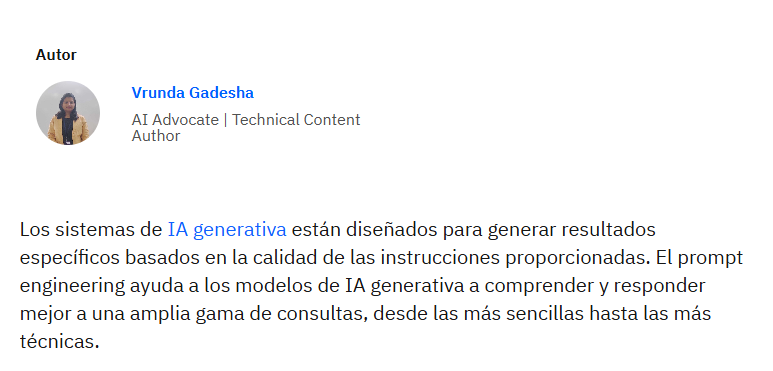

## Part 2: Zero-Shot Prompting

**Zero-shot prompting** means asking the model to perform a task without providing any examples.

This works well for:
- Simple, well-defined tasks
- General knowledge questions
- Common patterns the model has seen during training

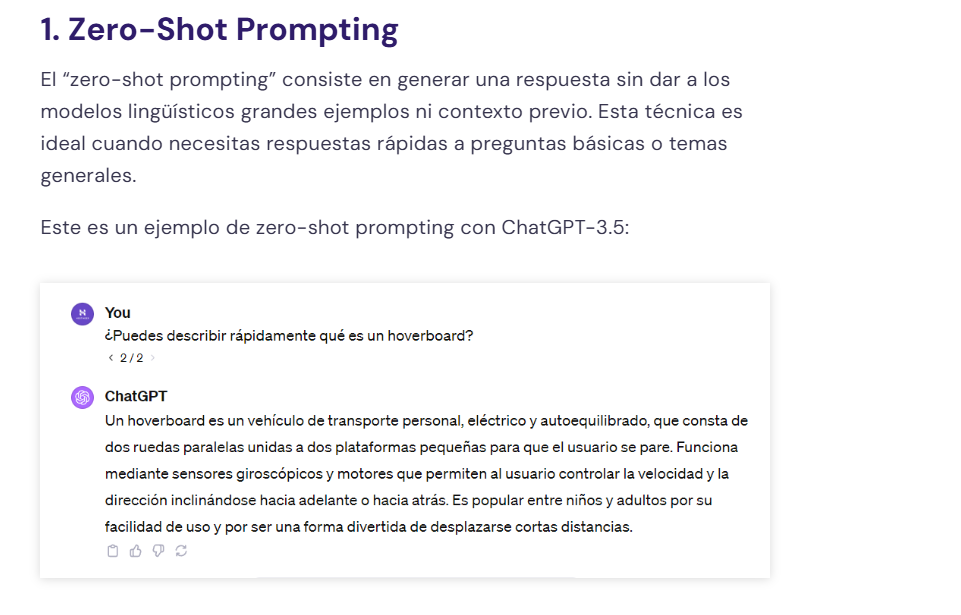

In [ ]:
# Example 1: Simple classification (zero-shot)
zero_shot_prompt = """Classify the following banking transaction as one of these categories:
- Groceries
- Dining
- Healthcare
- Transportation
- Entertainment
- Other

Transaction: "Supermercado La Colonia - $45.50"
Category:"""

messages = format_messages(
    system_prompt="You are a banking transaction classifier.",
    user_message=zero_shot_prompt
)

response = client.chat_completion(messages, temperature=0.3)
print("Zero-Shot Classification:")
print(response)
print("\n" + "="*80)

## Part 3: One-Shot Prompting

**One-shot prompting** provides a single example to guide the model's response format and style.

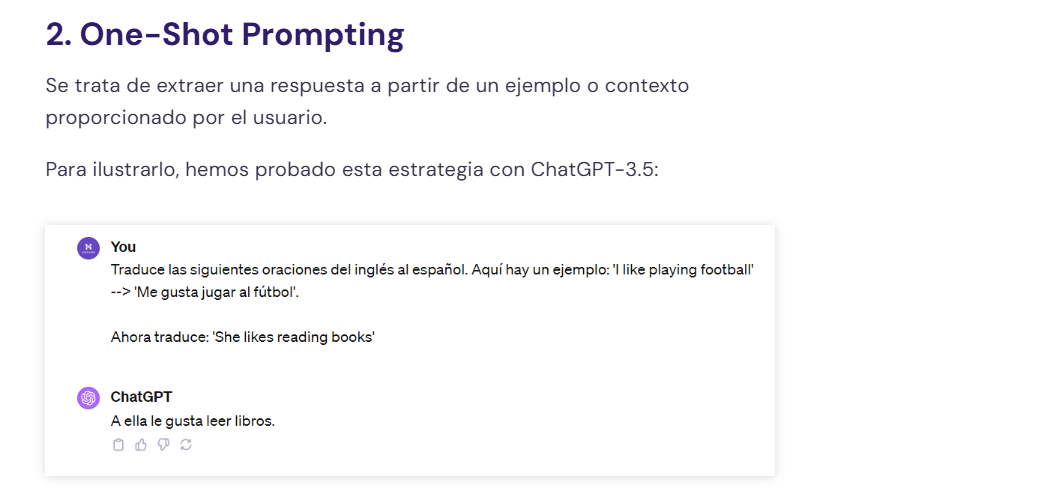

In [ ]:
# Example 2: One-shot learning
one_shot_prompt = """Classify banking transactions into categories.

Example:
Transaction: "Gasolinera Uno - $120.00"
Category: Transportation
Confidence: High
Reason: Gas station purchase

Now classify this transaction:
Transaction: "Restaurante El Jardín - $85.75"
Category:"""

messages = format_messages(
    system_prompt="You are a banking transaction classifier.",
    user_message=one_shot_prompt
)

response = client.chat_completion(messages, temperature=0.3)
print("One-Shot Classification:")
print(response)
print("\n" + "="*80)

## Part 4: Few-Shot Prompting

**Few-shot prompting** provides multiple examples to establish a clear pattern.

This is the most effective technique for:
- Consistent formatting
- Domain-specific tasks
- Complex classification
- Custom business logic

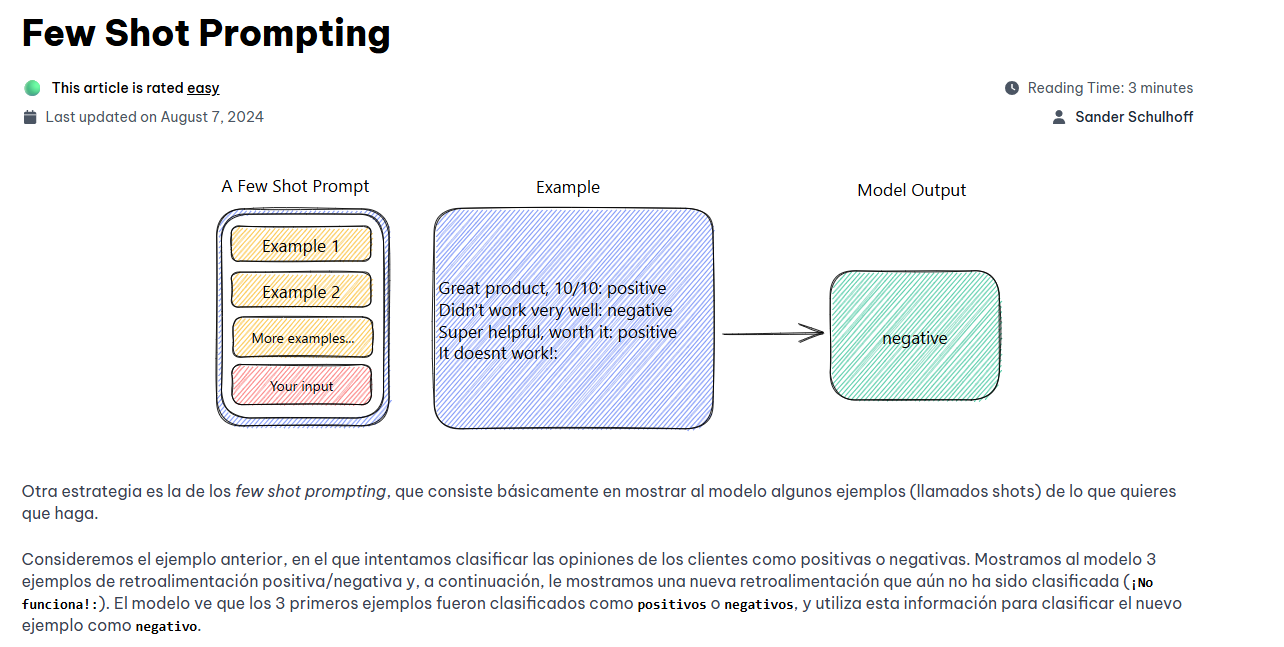

In [ ]:
# Example 3: Few-shot learning with multiple examples
few_shot_prompt = """Classify banking transactions and detect potential fraud.

Examples:

Transaction: "Supermercado La Colonia - $45.50 - 09:23 AM - San José"
Category: Groceries
Fraud Risk: Low
Reason: Normal grocery purchase during business hours in usual location

Transaction: "Casino Online - $2,500 - 10:30 PM - Unknown Location"
Category: Gambling
Fraud Risk: High
Reason: Large gambling transaction at unusual hour from unknown location

Transaction: "Farmacia San José - $350 - 11:20 AM - San José"
Category: Healthcare
Fraud Risk: Low
Reason: Normal pharmacy purchase during business hours in usual location

Transaction: "International Wire Transfer - $8,000 - 03:15 AM - Foreign Country"
Category: Transfer
Fraud Risk: High
Reason: Large international transfer at suspicious hour to foreign country

Now analyze this transaction:
Transaction: "Tienda Electrónica - $1,200 - 07:45 PM - San José"
Category:"""

messages = format_messages(
    system_prompt="You are an expert fraud detection system for BNCR.",
    user_message=few_shot_prompt
)

response = client.chat_completion(messages, temperature=0.3, max_tokens=200)
print("Few-Shot Classification with Fraud Detection:")
print(response)
print("\n" + "="*80)

## Part 5: Chain-of-Thought (CoT) Prompting

**Chain-of-Thought prompting** encourages the model to show its reasoning process step-by-step.

This dramatically improves performance on:
- Mathematical calculations
- Multi-step reasoning
- Complex decision-making
- Financial analysis

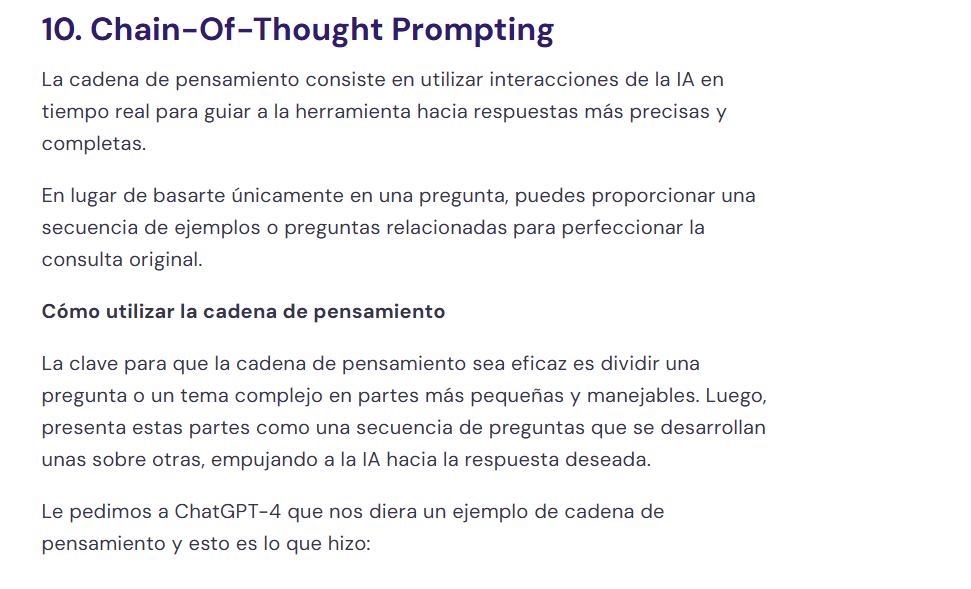

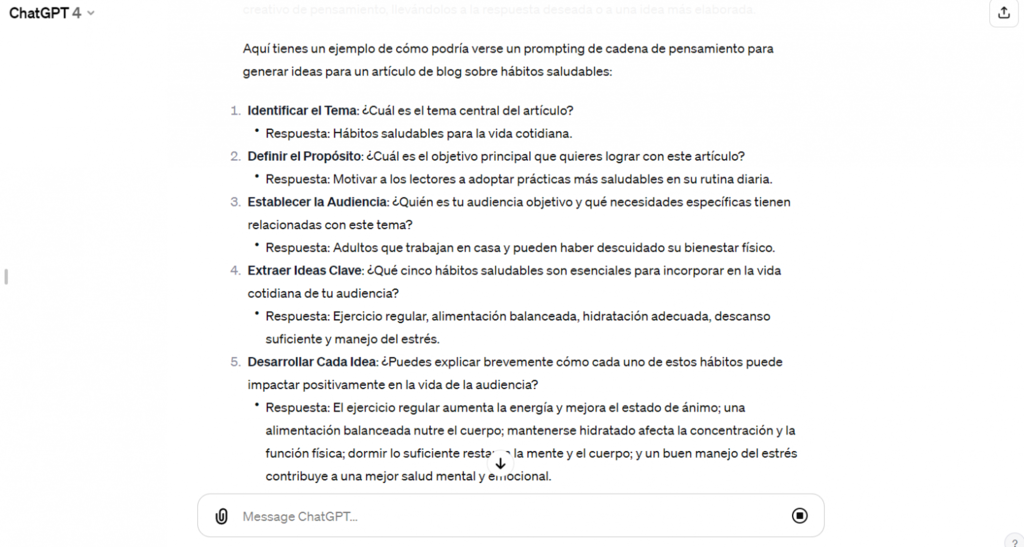

In [ ]:
# Example 4: Chain-of-Thought for loan eligibility
cot_prompt = """Determine if a customer is eligible for a personal loan.

Eligibility Criteria:
- Monthly income >= $2,000
- Debt-to-income ratio < 40%
- Credit score >= 650
- Employment history >= 6 months

Customer Profile:
- Monthly income: $3,500
- Current monthly debt payments: $1,200
- Credit score: 720
- Employment: 8 months at current job

Think through this step-by-step:
1. Check each criterion
2. Calculate debt-to-income ratio
3. Make final decision
4. Explain reasoning"""

messages = format_messages(
    system_prompt="You are a loan officer at BNCR. Always show your reasoning step-by-step.",
    user_message=cot_prompt
)

response = client.chat_completion(messages, temperature=0.3, max_tokens=400)
print("Chain-of-Thought Loan Eligibility Analysis:")
print(response)
print("\n" + "="*80)

## Part 6: Structured Output Prompting

For production systems, we often need responses in specific formats like JSON, CSV, or tables.

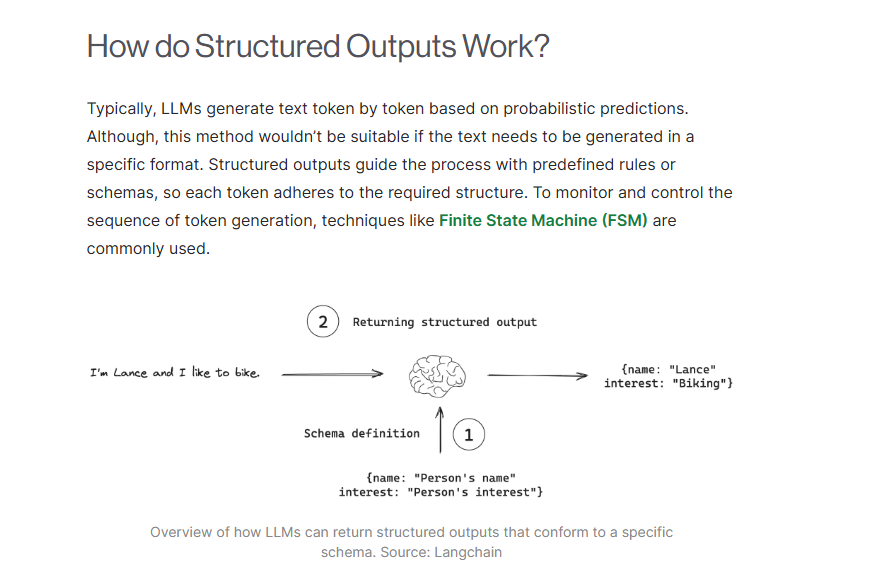

In [ ]:
# Example 5: JSON output for API integration
json_prompt = """Analyze this customer inquiry and extract structured information.

Customer Message: "Hi, I'm interested in opening a savings account. I'm 28 years old, 
work as a software engineer, and want to save for a house down payment in 3 years. 
I can deposit $500 monthly. What options do you recommend?"

Extract the following information in JSON format:
{
  "customer_age": <age>,
  "occupation": "<occupation>",
  "goal": "<savings goal>",
  "timeline": "<time horizon>",
  "monthly_deposit": <amount>,
  "product_interest": "<product type>",
  "recommended_products": [<list of suitable products>]
}"""

messages = format_messages(
    system_prompt="You are a banking assistant that extracts and structures customer information.",
    user_message=json_prompt
)

response = client.chat_completion(messages, temperature=0.3, max_tokens=300)
print("Structured JSON Output:")
print(response)

# Try to parse the JSON
try:
    # Extract JSON from response (might be wrapped in markdown)
    json_str = response.strip()
    if '```json' in json_str:
        json_str = json_str.split('```json')[1].split('```')[0]
    elif '```' in json_str:
        json_str = json_str.split('```')[1].split('```')[0]
    
    data = json.loads(json_str.strip())
    print("\n✓ Successfully parsed JSON")
    print(json.dumps(data, indent=2))
except Exception as e:
    print(f"\n⚠ Could not parse JSON: {e}")

print("\n" + "="*80)

## Part 7: Role-Based Prompting

Assigning specific roles helps the model adopt appropriate expertise and communication style.

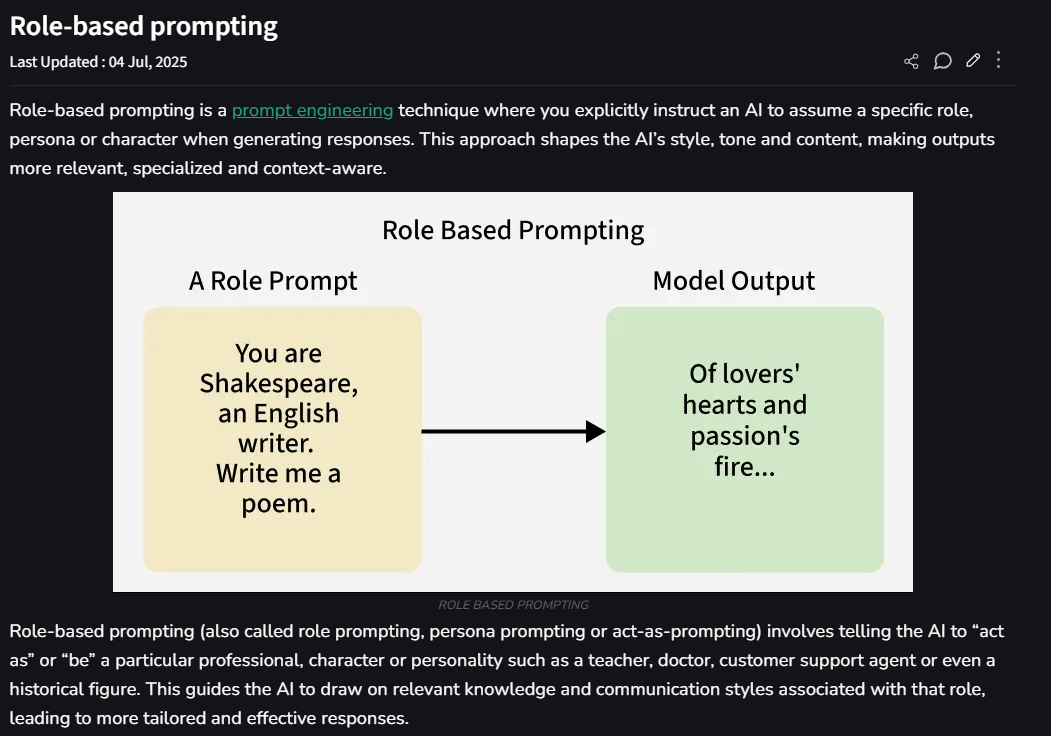

In [ ]:
# Example 6: Different roles for different audiences
question = "What is compound interest and how does it work?"

roles = [
    ("You are a financial advisor explaining to a 10-year-old child.", "Child"),
    ("You are a bank teller explaining to an average customer.", "Customer"),
    ("You are a finance professor teaching MBA students.", "MBA Student")
]

for system_prompt, audience in roles:
    print(f"\n{'='*80}")
    print(f"Audience: {audience}")
    print(f"{'='*80}\n")
    
    messages = format_messages(system_prompt, question)
    response = client.chat_completion(messages, temperature=0.7, max_tokens=200)
    print(response)

## Part 8: Handling Edge Cases and Constraints

Production prompts must handle edge cases, invalid inputs, and business constraints.

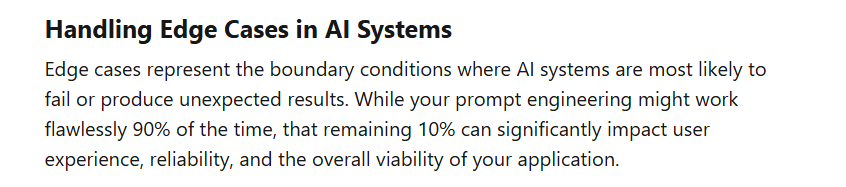

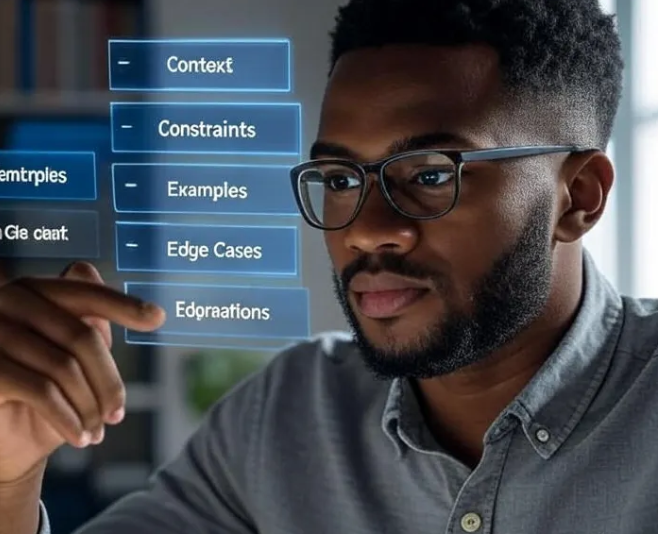

In [ ]:
# Example 7: Robust prompt with constraints
robust_prompt = """You are a customer service chatbot for BNCR with the following constraints:

CAPABILITIES:
- Answer questions about products and services
- Provide general banking information
- Guide customers to appropriate resources

LIMITATIONS:
- Cannot access customer account information
- Cannot perform transactions
- Cannot provide personalized financial advice
- Cannot discuss other banks or competitors

RULES:
1. If asked about account details, politely explain you cannot access accounts
2. If asked to perform transactions, direct to online banking or branch
3. If asked for financial advice, recommend speaking with an advisor
4. If asked about competitors, focus on BNCR's offerings
5. Always be professional, helpful, and security-conscious
6. Never make up information - admit when you don't know

Respond to this customer:"""

test_queries = [
    "What's my account balance?",
    "Can you transfer $500 to my friend?",
    "Should I invest in stocks or bonds?",
    "Is your bank better than Banco Popular?",
    "What are your savings account interest rates?"
]

for query in test_queries:
    print(f"\n{'='*80}")
    print(f"Customer: {query}")
    print(f"{'='*80}\n")
    
    messages = [
        {"role": "system", "content": robust_prompt},
        {"role": "user", "content": query}
    ]
    
    response = client.chat_completion(messages, temperature=0.5, max_tokens=200)
    print(f"Assistant: {response}")

## Part 9: Prompt Templates and Reusability

Create reusable prompt templates for common banking scenarios.

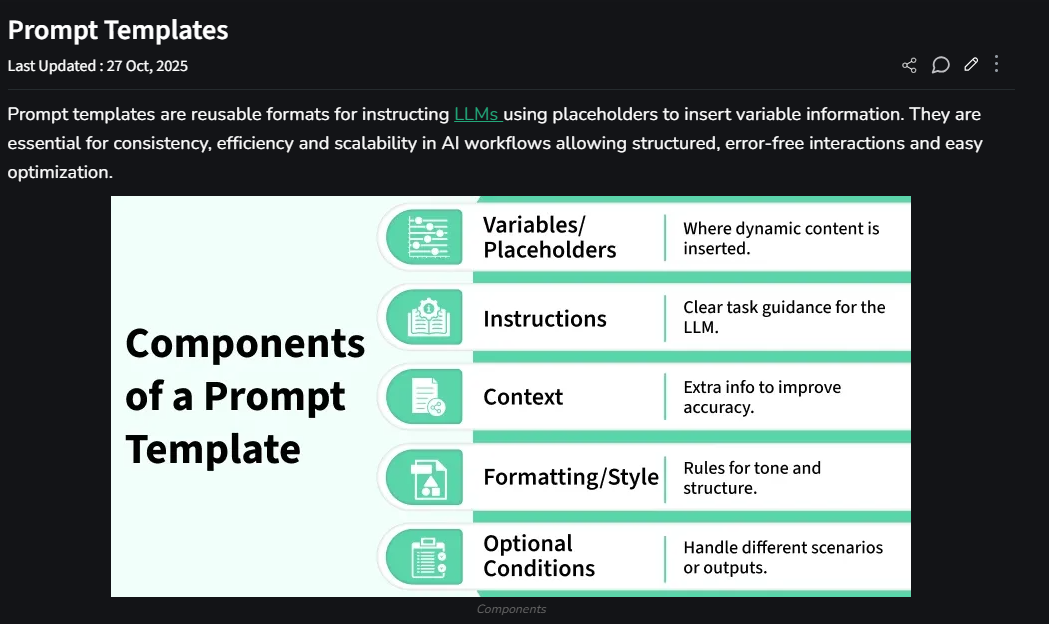

In [ ]:
# Example 8: Prompt template system
class BankingPromptTemplates:
    
    @staticmethod
    def fraud_detection(transaction_details):
        return f"""Analyze this transaction for fraud risk:

{transaction_details}

Provide:
1. Risk Level (Low/Medium/High)
2. Risk Factors identified
3. Recommended action
4. Confidence score (0-100%)

Format as JSON."""
    
    @staticmethod
    def product_recommendation(customer_profile):
        return f"""Based on this customer profile, recommend suitable banking products:

{customer_profile}

For each recommended product, provide:
1. Product name
2. Why it's suitable
3. Key benefits
4. Important considerations

Limit to top 3 recommendations."""
    
    @staticmethod
    def customer_sentiment(message):
        return f"""Analyze the sentiment and urgency of this customer message:

"{message}"

Provide:
- Sentiment: (Positive/Neutral/Negative)
- Urgency: (Low/Medium/High/Critical)
- Main concern: (brief description)
- Suggested response priority: (1-5, where 5 is highest)
- Recommended department: (Customer Service/Technical/Fraud/Loans/etc.)

Format as JSON."""

# Test the templates
templates = BankingPromptTemplates()

# Test 1: Fraud detection
transaction = """Transaction ID: TXN12345
Amount: $5,000
Merchant: Online Casino
Time: 2:30 AM
Location: Foreign Country
Customer's usual location: San José, Costa Rica
Customer's usual transaction amount: $50-200"""

print("Test 1: Fraud Detection")
print("="*80)
messages = format_messages(
    "You are a fraud detection expert at BNCR.",
    templates.fraud_detection(transaction)
)
response = client.chat_completion(messages, temperature=0.3, max_tokens=300)
print(response)

print("\n" + "="*80 + "\n")

# Test 2: Sentiment analysis
customer_message = """I've been trying to access my account for 3 days and your app keeps crashing! 
I have bills to pay and I'm getting very frustrated. This is unacceptable!"""

print("Test 2: Sentiment Analysis")
print("="*80)
messages = format_messages(
    "You are a customer service analyst at BNCR.",
    templates.customer_sentiment(customer_message)
)
response = client.chat_completion(messages, temperature=0.3, max_tokens=250)
print(response)

## Part 10: Measuring Prompt Quality

How do we know if our prompts are good? Let's establish metrics.

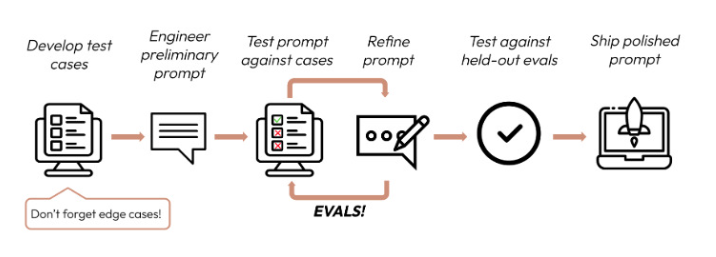

In [ ]:
# Example 9: A/B testing different prompts
import time

def evaluate_prompt(system_prompt, user_message, test_name, runs=3):
    """
    Evaluate a prompt across multiple runs
    """
    results = []
    total_tokens = 0
    total_time = 0
    
    for i in range(runs):
        start_time = time.time()
        messages = format_messages(system_prompt, user_message)
        
        response = client.client.chat.completions.create(
            model=client.gpt35_deployment,
            messages=messages,
            temperature=0.7,
            max_tokens=200
        )
        
        elapsed = time.time() - start_time
        
        results.append(response.choices[0].message.content)
        total_tokens += response.usage.total_tokens
        total_time += elapsed
    
    return {
        "test_name": test_name,
        "responses": results,
        "avg_tokens": total_tokens / runs,
        "avg_time": total_time / runs,
        "consistency": len(set(results)) == 1  # All responses identical
    }

# Compare two approaches
question = "What documents do I need to open a savings account?"

# Prompt A: Simple
prompt_a = "You are a helpful banking assistant."

# Prompt B: Detailed
prompt_b = """You are a banking assistant at BNCR. When answering questions about account opening:
1. List required documents clearly
2. Mention any age requirements
3. Note minimum deposit if applicable
4. Keep response concise (under 100 words)"""

print("Evaluating Prompt A (Simple)...")
result_a = evaluate_prompt(prompt_a, question, "Prompt A")

print("Evaluating Prompt B (Detailed)...")
result_b = evaluate_prompt(prompt_b, question, "Prompt B")

# Display results
print("\n" + "="*80)
print("COMPARISON RESULTS")
print("="*80)

for result in [result_a, result_b]:
    print(f"\n{result['test_name']}:")
    print(f"  Average tokens: {result['avg_tokens']:.1f}")
    print(f"  Average time: {result['avg_time']:.2f}s")
    print(f"  Consistent: {result['consistency']}")
    print(f"\n  Sample response:\n  {result['responses'][0][:200]}...")

## 🎯 Practical Exercise 1: Credit Card Application Screener

Create a prompt that screens credit card applications and provides structured output.

Requirements:
- Use few-shot learning with 2-3 examples
- Output must be valid JSON
- Include eligibility decision, reasons, and recommended card tier
- Handle edge cases (missing info, unrealistic values)

In [ ]:
# TODO: Create credit card application screener
# TODO: Test with various applicant profiles
# TODO: Validate JSON output

# Your code here:


## 🎯 Practical Exercise 2: Intelligent FAQ Router

Build a system that routes customer questions to the appropriate department.

Requirements:
- Use chain-of-thought reasoning
- Classify into: Accounts, Cards, Loans, Technical, Fraud, General
- Provide urgency score (1-5)
- Suggest if human escalation is needed

In [ ]:
# TODO: Create FAQ routing system
# TODO: Test with various customer questions
# TODO: Measure accuracy

# Your code here:


## 🎯 Practical Exercise 3: Prompt Optimization Challenge

You have a prompt that works but uses too many tokens. Optimize it!

Original task: "Summarize customer feedback and extract key issues"

Goals:
- Reduce token usage by 30%
- Maintain or improve output quality
- Keep response time under 2 seconds

In [ ]:
# Sample customer feedback
feedback = """I've been a customer for 5 years and generally happy with the service. 
However, the mobile app has been very slow lately and sometimes crashes when I try to 
transfer money. The customer service team is helpful but wait times are too long - 
I waited 45 minutes last week. Also, I think the fees for international transfers are 
higher than other banks. On the positive side, I love the new savings account features 
and the interest rates are competitive."""

# TODO: Create optimized prompt
# TODO: Compare with verbose version
# TODO: Measure token usage and quality

# Your code here:


## Summary and Best Practices

### Key Techniques Learned:

1. **Zero-Shot**: Direct task description, no examples
2. **One-Shot**: Single example to guide format
3. **Few-Shot**: Multiple examples for consistency
4. **Chain-of-Thought**: Step-by-step reasoning
5. **Structured Output**: JSON, tables, specific formats
6. **Role-Based**: Assign expertise and communication style

### Prompt Engineering Best Practices:

**Be Specific**
- Clear instructions beat vague requests
- Define expected output format
- Specify constraints and limitations

**Provide Context**
- Include relevant background information
- Define the role and expertise level
- Clarify the audience

**Use Examples**
- Few-shot learning dramatically improves consistency
- Examples should cover edge cases
- Show the exact format you want

**Iterate and Test**
- Test prompts with multiple inputs
- Measure consistency across runs
- A/B test different approaches
- Monitor token usage and costs

**Handle Edge Cases**
- Define what to do with invalid inputs
- Set clear boundaries (what you can/can't do)
- Include fallback responses

**Optimize for Production**
- Balance quality vs. token usage
- Use templates for reusability
- Version control your prompts
- Document what works and why

### Banking-Specific Guidelines:

- **Security First**: Never request or expose sensitive data
- **Compliance**: Ensure responses align with regulations
- **Accuracy**: Financial information must be precise
- **Transparency**: Make limitations clear to users
- **Consistency**: Banking requires reliable, predictable responses

### Next Steps:

In Lab 07, we'll apply these techniques to build a complete customer service chatbot with advanced conversation management.

---

**Questions or Issues?**  
Contact: Manuela Larrea | manuela.larrea@idataglobal.com